# **1. Inializing and Downloading Dataset for Project**

To begin any machine learning or deep learning project, the first and most crucial step is acquiring a reliable and well-structured dataset. In this case, we have used the Kaggle platform—a widely popular source among data scientists and machine learning practitioners—to download a dataset related to rice type classification.

To facilitate the download process programmatically, the Python library `opendatasets` has been utilized. This library simplifies the process of accessing datasets directly from Kaggle using dataset URLs. The installation of the `opendatasets` library is done using a `pip` command, which ensures that we can call its functionality in the notebook or script. Once installed, the `download()` function from `opendatasets` is used along with the dataset URL to fetch the data directly into our working directory. This approach not only makes data access more convenient but also ensures reproducibility and automation in the data pipeline.

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tamoorshehzad
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


# **2. Importing Essential Libraries and Setting Up the Environment for Model Development**

Once the dataset is downloaded, the next step involves importing the essential libraries required for building, training, and evaluating machine learning and deep learning models. This project leverages both PyTorch—a powerful and flexible deep learning framework—and popular machine learning utilities from libraries like scikit-learn, NumPy, and pandas.

The PyTorch library provides core functionality for constructing deep learning models through modules like `torch.nn` for defining layers and activation functions, and `torch.optim` for optimization algorithms like Adam. The `torch.utils.data` module allows for efficient handling of datasets and creating iterable data loaders. Additionally, the `torchsummary` package is used to print out the model architecture and parameter summaries, which helps in understanding the model structure at a glance.

On the machine learning side, `train_test_split` from scikit-learn is used to divide the dataset into training and testing sets, ensuring a proper evaluation setup. The `accuracy_score` function allows us to quantitatively assess how well the model performs on unseen data.

For data manipulation and analysis, the pandas library is indispensable. It provides high-performance data structures like DataFrames, which are ideal for reading and processing tabular datasets. NumPy complements this by offering support for large, multi-dimensional arrays and numerous mathematical operations. Matplotlib is also imported to visualize data trends, training progress, or performance metrics.

A key step in preparing for model training is to set the device for computation. The code checks if a CUDA-compatible GPU is available and sets it as the computation device. If not, it defaults to the CPU. This ensures that the model can take advantage of GPU acceleration for faster training when available, making the process significantly more efficient, especially for deep learning tasks. With the environment and tools in place, the groundwork is now ready for data preprocessing and model development.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device= 'cuda' if torch.cuda.is_available() else 'cpu'


# **3. Loading and Inspecting the Dataset**

After preparing the environment and importing the necessary libraries, the next step in the workflow is to load the dataset into a format suitable for analysis and modeling. This is achieved using the pandas library, which is a go-to tool in the data science community for handling structured data. The dataset in this case is read from a CSV file using the `read_csv()` function. This function reads the content of the file and stores it in a pandas DataFrame, which is a tabular data structure similar to a spreadsheet or SQL table, making it highly convenient for both data exploration and preprocessing.

The dataset being used here is the rice type classification dataset, which contains various attributes or features that describe different grains of rice, along with their corresponding class labels. After loading the dataset, the `head()` function is called, which displays the first few rows of the DataFrame. This is a common practice in data science to get a quick glance at the structure of the data, the types of features available, and whether there are any apparent issues such as missing values or unexpected data types. This initial inspection sets the foundation for the next steps in the machine learning pipeline, such as data cleaning, feature selection, and transformation.

In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


# **4. Data Cleaning and Preprocessing**

Once the dataset is loaded into a pandas DataFrame, the next essential step is to clean and preprocess the data to ensure it is ready for training machine learning or deep learning models. Clean data is crucial because the quality of the input data directly impacts the performance and reliability of any predictive model.

The first operation performed here is the removal of any rows that contain missing values using the `dropna()` function. Missing or null values can lead to errors or unreliable outputs during model training, so it’s a best practice to either fill or remove them depending on the context and quantity. In this case, all rows with missing entries are dropped to preserve the integrity of the dataset.

The second cleaning step involves dropping the `id` column using the `drop()` method with the `axis=1` parameter, which specifies that a column (not a row) is being removed. The id field is typically a unique identifier and does not contribute to the prediction or classification process. Including such a feature can introduce noise or even data leakage into the model, so it's important to eliminate non-informative or irrelevant features before training.

Finally, the shape of the cleaned dataset is displayed using the `shape` attribute, which returns a tuple indicating the number of rows and columns. This gives a quick overview of how many data points and features remain after preprocessing. With a cleaned and structured dataset, the process can now move forward to data transformation and model training.

In [ ]:
data_df.dropna(inplace= True)
data_df.drop(['id'], axis = 1, inplace= True)
data_df.shape

(18185, 11)

# **5. Feature Scaling for Model Optimization**

After cleaning the dataset, the next crucial step in preparing data for machine learning and deep learning models is feature scaling. Scaling ensures that all features contribute equally to the learning process, preventing models from being biased toward features with larger numerical ranges. This is particularly important for gradient-based models like neural networks, where differences in feature scale can lead to unstable training and slower convergence.

In this project, a normalization technique has been applied where each feature value is divided by the absolute maximum value of that column. This scales all features to a range roughly between -1 and 1 or 0 and 1, depending on whether the original values were positive or included negative numbers. Such scaling maintains the distribution of the original data while ensuring uniformity across all features.

Before performing this operation, a copy of the original dataset is saved in `original_df`. This is a good practice as it preserves the unaltered version of the data, which might be useful later for visualization, debugging, or interpreting model predictions in the original scale.

The loop iterates over each column in the DataFrame and applies the scaling transformation. The result is a normalized dataset stored back in `data_df`, which is ready to be fed into the model. Finally, displaying the head of the scaled DataFrame confirms that the transformation has been applied, providing a clear view of how the feature values have been adjusted. This step ensures that the model trains efficiently and effectively, leading to more reliable and accurate predictions.

In [ ]:
original_df = data_df.copy()

for column in data_df.columns:
  data_df[column]= data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


# **6. Splitting the Dataset for Training, Testing, and Validation**

Once the features have been scaled appropriately, the next critical step in building a reliable machine learning or deep learning model is dividing the dataset into separate subsets for training, testing, and validation. This process ensures that the model is not only trained effectively but also evaluated fairly on unseen data, providing a true indication of its generalization performance.

In this step, the dataset is first separated into input features `(X)` and target labels `(y)`. This is done using pandas slicing, where all columns except the last one are used as features, and the last column, which contains the rice types, is used as the label. These arrays are then converted to NumPy arrays for compatibility with most machine learning and deep learning frameworks.

The data is then split using the `train_test_split` function from scikit-learn. Initially, the dataset is divided into training and testing sets, with 70% allocated for training and 30% for testing. The testing set is further split into two equal parts to create a validation set. The final result is three subsets: training data used to train the model, validation data to tune hyperparameters and monitor for overfitting, and test data to evaluate the model's final performance on unseen data.

This three-way split is a common and effective strategy in modern machine learning workflows. It helps ensure that the model performs well not just on the training data, but also on new, real-world data. The shapes of each split are printed to confirm the sizes and to ensure that the splits have been performed correctly. This step lays the foundation for robust model training and evaluation in the subsequent phases.

In [ ]:
X = np.array(data_df.iloc[:, :-1])
y = np.array(data_df.iloc[:, -1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


# **7. Creating Custom Datasets for Deep Learning with PyTorch**

With the data split into training, validation, and test sets, the next step is to format the data in a way that is compatible with PyTorch's training workflow. PyTorch provides a powerful and flexible system for managing data through its `Dataset` and `DataLoader` classes. To utilize this system, a custom dataset class is defined by extending PyTorch’s built-in `Dataset` class.

In this custom dataset class, the constructor `(__init__)` receives the feature and label arrays as inputs and converts them into PyTorch tensors using `torch.tensor`. These tensors are explicitly set to a data type of `float32`, which is the standard for numerical operations in deep learning. Additionally, the data is immediately moved to the appropriate computation device—either a GPU (`cuda`) or CPU—based on what is available. This ensures that the model training will leverage hardware acceleration if possible, greatly improving performance.

The `__len__` method returns the total number of samples in the dataset, which is required by PyTorch to understand the size of the dataset. The `__getitem__` method retrieves a single sample and its corresponding label by index, allowing for efficient data batching and shuffling during training.

Once the custom class is defined, it is used to wrap the training, validation, and test datasets into `train_dataset`, `validation_dataset`, and `test_dataset` respectively. This modular and object-oriented design not only organizes the data neatly but also prepares it for integration with PyTorch’s `DataLoader`, which will handle batching, shuffling, and parallel data loading during model training. This step is crucial for creating a seamless and efficient training loop, especially when dealing with large datasets and deep learning models.

In [ ]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


train_dataset = dataset(X_train, y_train)
validation_dataset = dataset(X_val, y_val)
test_dataset = dataset(X_test, y_test)

# **8. Preparing Data Loaders for Efficient Model Training**

Once the datasets are structured using a custom PyTorch `Dataset` class, the next step is to streamline the process of feeding this data into the model. This is achieved using PyTorch’s `DataLoader `class, which handles batching, shuffling, and efficient loading of data during the training and evaluation phases.

Data loaders are created separately for the training, validation, and test datasets. Each `DataLoader` is initialized with the corresponding dataset, a batch size of 8, and the `shuffle` parameter set to `True`. The batch size defines how many samples will be processed at a time by the model. A smaller batch size like 8 is often used when training on systems with limited GPU memory, and it also allows for more frequent updates to model weights, potentially helping with convergence.

Setting `shuffle=True` ensures that the data is randomly shuffled at the beginning of each epoch. This is particularly important for training data, as it prevents the model from learning any unintended patterns that might be present due to the order of the data. For validation and test data, shuffling is less critical but can still help ensure randomness during evaluation.

By encapsulating the datasets within data loaders, we enable seamless and efficient data iteration during training. This design not only simplifies the training loop but also improves performance through features like background data loading and automatic mini-batch creation. With the data pipeline now fully prepared, the stage is set to define and train the machine learning or deep learning models.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size= 8, shuffle = True)
val_dataloader = DataLoader(validation_dataset, batch_size= 8, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size= 8, shuffle = True)

# **9. Designing a Feedforward Neural Network for Rice Type Classification**

To perform rice type classification using deep learning, a basic yet functional neural network model is constructed using PyTorch’s object-oriented architecture. The model is defined within a custom class called `MyModel`, which inherits from `nn.Module`, the fundamental building block for all neural network models in PyTorch. This class-based approach offers flexibility and clarity when building, modifying, or scaling deep learning models.

The model begins with an input layer, created using `nn.Linear`, which maps the input features to a set of neurons defined by the variable `HIDDEN_NEURONS`, set to 10. This hidden layer introduces non-linearity and learns abstract representations from the raw input data. Although small, this hidden layer is sufficient for demonstrating the core mechanics of neural networks and understanding how input transformations can aid classification.

Following the hidden layer is another linear layer that reduces the output dimension to 1. Since this task involves binary classification—predicting one of two possible rice types—the final output should be a single probability value between 0 and 1. To achieve this, a sigmoid activation function (`nn.Sigmoid`) is applied at the end. The sigmoid squashes the raw score from the final linear layer into a probability, making it interpretable as the likelihood of belonging to the positive class.

The `forward()` method describes how data flows through the model—from the input layer to the hidden layer, through to the output layer, and finally through the sigmoid activation. This explicit definition allows PyTorch to automatically handle gradient calculations during backpropagation.

After defining the architecture, the model is instantiated and moved to the appropriate computing device (`cuda` for GPU if available, otherwise `cpu`). The `summary()` function then provides a concise overview of the model, displaying the shape of each layer’s output and the number of parameters to be trained. This helps ensure the architecture is correctly constructed and suitable for the given input data.

In [ ]:
HIDDEN_NEURONS=10
class MyModel(nn.Module):

  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# **10. Defining the Loss Function and Optimizer for Model Training**

With the model architecture in place, the next crucial step in the training process is selecting the appropriate loss function and optimization algorithm. These components guide the model in learning from the data by updating its internal parameters during each iteration.

The loss function chosen here is Binary Cross Entropy Loss (`BCELoss`), which is specifically designed for binary classification problems. Since the model's output layer uses a sigmoid activation function and returns a single probability value between 0 and 1, `BCELoss` is the ideal choice. It quantifies the difference between the predicted probability and the actual class label (0 or 1), penalizing incorrect predictions more heavily the further they are from the true label. This feedback is essential for steering the model toward better performance over time.

To minimize this loss during training, the Adam optimizer is used. Adam, short for Adaptive Moment Estimation, is a widely used optimization algorithm in deep learning due to its ability to combine the advantages of both the AdaGrad and RMSprop methods. It adapts the learning rate for each parameter individually, based on estimates of the first and second moments of the gradients. This adaptability makes Adam particularly effective for models with a large number of parameters or when training data is noisy.

The optimizer is initialized with the model’s parameters and a learning rate of `1e-3`, which determines the step size for each update. This learning rate is a common starting point and generally works well for most problems. Fine-tuning it later can further improve model performance.

By pairing a suitable loss function with a powerful optimizer, this setup creates a strong foundation for training the model effectively. Together, they ensure the model learns meaningful patterns from the data and gradually improves its predictive accuracy.

In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr= 1e-3)

# **11. Training the Neural Network and Tracking Model Performance**

With the model, loss function, and optimizer defined, the next step is to train the neural network and evaluate its learning progress over multiple epochs. An epoch refers to one complete pass through the entire training dataset. Here, the model is trained for 10 epochs, allowing it to iteratively refine its predictions based on feedback from the loss function.

Before training begins, several lists are initialized to store the loss and accuracy values for both the training and validation phases. These metrics will be used to track the model’s performance over time and to visualize learning trends later.

Each epoch consists of two phases: training and validation. During the training phase, the model processes batches of data from the training set. For each batch, inputs and labels are passed through the model to generate predictions. Since the model outputs a single probability per input sample, `.squeeze(1)` is used to match the shape of the labels. The binary cross entropy loss is then calculated between the predictions and true labels.

This loss is accumulated for all batches to get the total loss for the epoch. Simultaneously, the number of correct predictions is counted by comparing the rounded predictions to the actual labels, enabling the calculation of accuracy. After computing the loss, backpropagation is performed using `backward()`, which calculates gradients, and the optimizer updates the model parameters using `step()`. Gradients are then reset using `zero_grad()` to prepare for the next batch.

The validation phase follows, where the model's performance is evaluated on unseen data without updating the model's weights. The validation loop is wrapped in `torch.no_grad()` to disable gradient calculation, reducing memory usage and speeding up execution. The same steps of prediction, loss computation, and accuracy calculation are repeated.

After each epoch, the average training and validation loss (divided by 1000 for readability) and accuracy are recorded. These values are appended to their respective lists, enabling later visualization of the model's learning progress. Finally, the results for each epoch are printed, showing how well the model is learning over time.

This structured training loop, combined with validation checks, provides a clear and effective approach to training deep learning models, allowing practitioners to monitor convergence and detect potential issues like overfitting or underfitting early in the training process.

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

EPOCHS = 10

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    ## Training and Validation
    for data in train_dataloader:

        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)

        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    ## Validation
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(train_dataset.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_dataset.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(train_dataset.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_dataset.__len__())*100):.4f}''')
    print("="*50)

Epoch no. 1 Train Loss: 0.6092 Train Accuracy: 90.3056 Validation Loss: 0.0440 Validation Accuracy: 97.5440
Epoch no. 2 Train Loss: 0.1335 Train Accuracy: 98.4131 Validation Loss: 0.0205 Validation Accuracy: 98.4971
Epoch no. 3 Train Loss: 0.0845 Train Accuracy: 98.6095 Validation Loss: 0.0165 Validation Accuracy: 98.5704
Epoch no. 4 Train Loss: 0.0723 Train Accuracy: 98.6488 Validation Loss: 0.0158 Validation Accuracy: 98.5704
Epoch no. 5 Train Loss: 0.0674 Train Accuracy: 98.6959 Validation Loss: 0.0150 Validation Accuracy: 98.3504
Epoch no. 6 Train Loss: 0.0664 Train Accuracy: 98.6645 Validation Loss: 0.0147 Validation Accuracy: 98.3871
Epoch no. 7 Train Loss: 0.0660 Train Accuracy: 98.6488 Validation Loss: 0.0143 Validation Accuracy: 98.5337
Epoch no. 8 Train Loss: 0.0657 Train Accuracy: 98.6173 Validation Loss: 0.0155 Validation Accuracy: 98.5704
Epoch no. 9 Train Loss: 0.0655 Train Accuracy: 98.7116 Validation Loss: 0.0145 Validation Accuracy: 98.5337
Epoch no. 10 Train Loss: 0.0

# **12. Evaluating the Model on Unseen Test Data**

After the training and validation processes are complete, the final step in the machine learning workflow is to assess the model's performance on the test dataset. This step is crucial because it provides an unbiased estimate of how the model will perform on completely unseen data, which is the ultimate goal in any real-world application.

The testing phase is conducted within a `torch.no_grad()` block to ensure that PyTorch does not track gradients. This not only speeds up the execution but also conserves memory, as no backward pass or gradient computation is needed during evaluation.

For each batch of data in the test data loader, the model generates predictions, which are then compared to the actual labels. The binary cross-entropy loss is calculated for each batch, and the total loss is accumulated. The predicted probabilities are rounded to either 0 or 1 to obtain binary predictions, and the number of correct predictions is counted to compute accuracy.

Once all test batches have been processed, the total accuracy is calculated by dividing the number of correct predictions by the total number of test samples and then multiplying by 100 to express it as a percentage. This final score is printed to give a clear summary of the model’s ability to generalize beyond the data it was trained on.

Testing on unseen data not only confirms that the model has learned useful patterns but also helps identify whether issues like overfitting have occurred. A high accuracy score on the test set indicates that the model has successfully captured the underlying structure of the data and is ready for deployment or further experimentation.

In [ ]:
#Testing
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")

Accuracy Score is: 98.42%


# **13. Visualizing Model Training and Validation Performance**

Visualizing the training process is an essential part of understanding how well a machine learning or deep learning model is learning over time. By plotting both loss and accuracy metrics for the training and validation phases across all epochs, we gain valuable insights into the model’s learning behavior and can identify potential issues like underfitting or overfitting.

A subplot with two panels is created using Matplotlib: one for the loss and the other for accuracy. In the first panel, the training loss and validation loss are plotted against the number of epochs. A consistent decrease in training loss usually indicates that the model is successfully minimizing the error on the training data. The validation loss, on the other hand, serves as a checkpoint to ensure that the model is not just memorizing the data but is generalizing well to unseen samples. If the validation loss begins to increase while the training loss continues to decrease, it can be a signal that the model is overfitting.

In the second panel, the training and validation accuracies are similarly plotted over the epochs. A gradual increase in both curves suggests effective learning, while a large gap between the two could imply that the model is performing well on training data but poorly on validation data, again pointing to overfitting.

The plots are enhanced with titles, axis labels, legends, and consistent scaling for clarity. The use of `tight_layout()` ensures that the subplot elements do not overlap, making the visualization more readable.

These visualizations not only provide a clearer picture of the model’s progression but also serve as a powerful tool for storytelling in machine learning projects—especially useful for reports, presentations, and posts intended to educate or inform others. They offer an intuitive way to interpret the model's learning dynamics and justify the design decisions made during the modeling process.

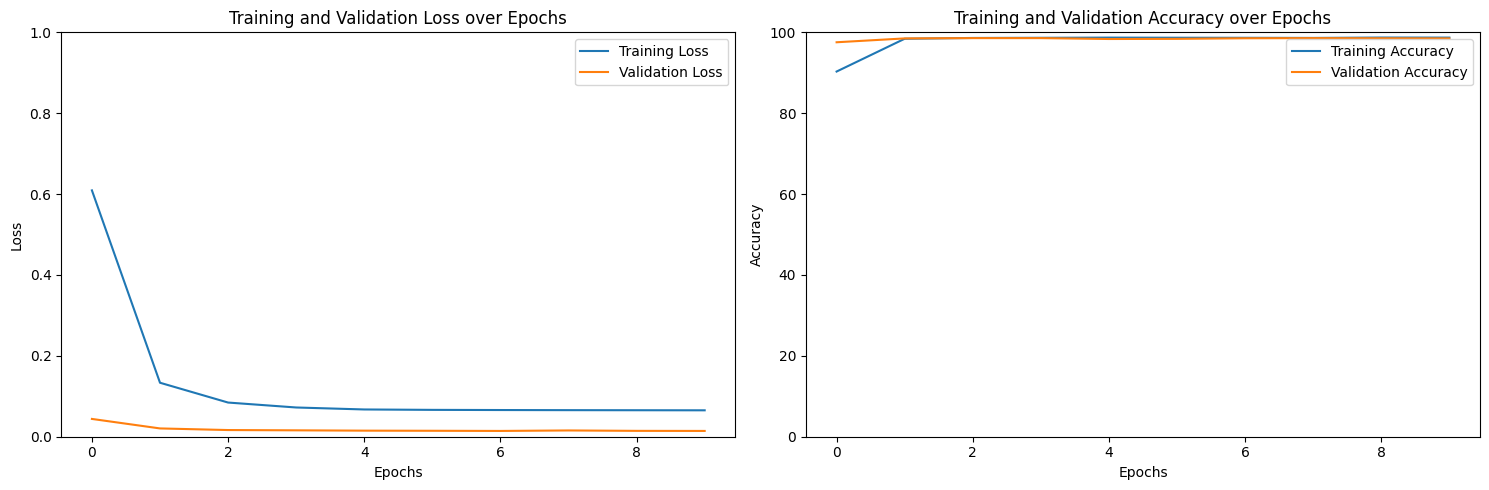

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 1])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()

# **14. Making Predictions Using the Trained Model (Inference Phase)**

The final step in a machine learning or deep learning workflow is making predictions on new, real-world data—a process known as inference. This phase demonstrates the practical utility of the model after training, validation, and testing. Here, a simple yet interactive approach is adopted where a user manually inputs feature values to predict the class of a rice grain using the trained neural network.

To begin, the user is prompted to enter numerical values for each of the features used during training, such as Area, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, and others. To ensure the input aligns with the format of the training data, each value is normalized using the maximum absolute value from the original dataset—just as was done during preprocessing. This step is critical because feeding raw, unnormalized data would lead to inconsistent results, as the model expects inputs in the normalized range it was trained on.

Once all feature values are collected and normalized, they are combined into a list representing a single input sample. This list is converted into a PyTorch tensor and moved to the appropriate device (CPU or GPU) for compatibility with the model.

The tensor is then passed through the model to generate a prediction. Since the model outputs a probability between 0 and 1 due to the Sigmoid activation function in the final layer, this value is rounded to produce a binary classification. The output indicates the predicted class of the rice grain based on the features provided.

This inference mechanism not only validates the model’s deployment capability but also serves as a hands-on demonstration of applying deep learning in a real-time scenario. It bridges the gap between model development and real-world application, making the project more relatable and understandable—especially for readers who are new to AI and machine learning.

In [ ]:
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

Area: 3453
Major Axis Length: 345
Minor Axis Length: 23
Eccentricity: 0.56
Convex Area: 4567
EquivDiameter: 345
Extent: 0.765
Perimeter: 678
Roundness: 0.876
AspectRation: 1.54
tensor([0.0012], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  0
